Datensatz hat 1987 Zeilen und 9 Spalten

=== BENFORDS LAW TEST (AnnualIncome) ===


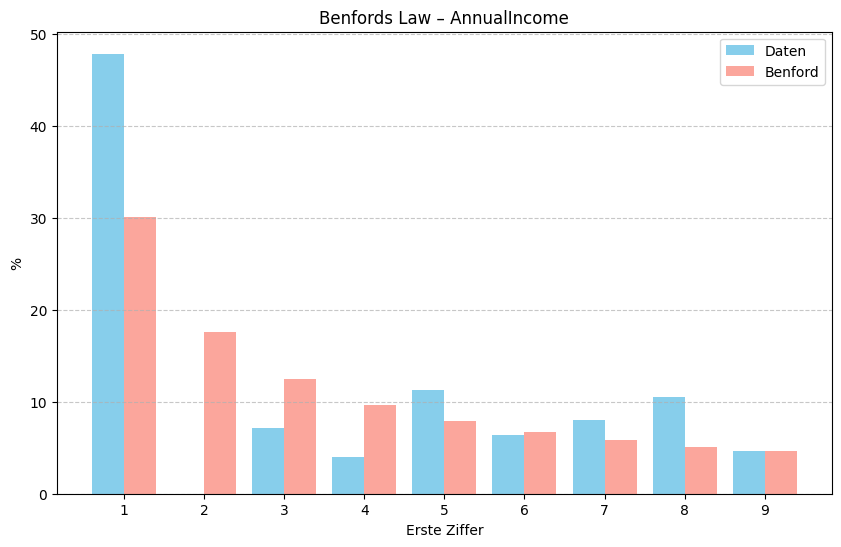

Fazit: Die Daten halten sich SEHR gut an Benfords Law!
→ Wahrscheinlich KEINE synthetischen Daten (oder extrem gut gemacht)

Wie viele Leute haben eine Reiseversicherung gekauft?
TravelInsurance
0    1277
1     710
Name: count, dtype: int64


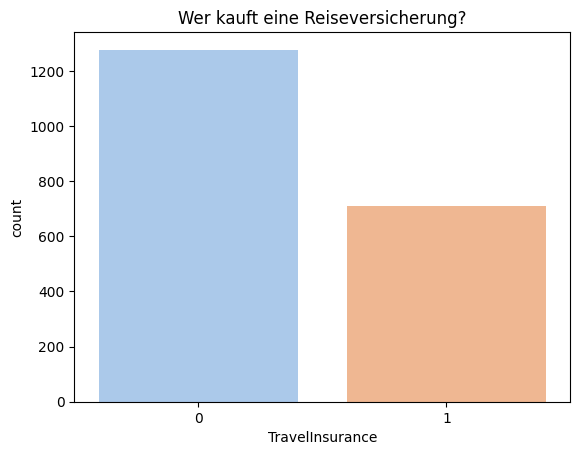

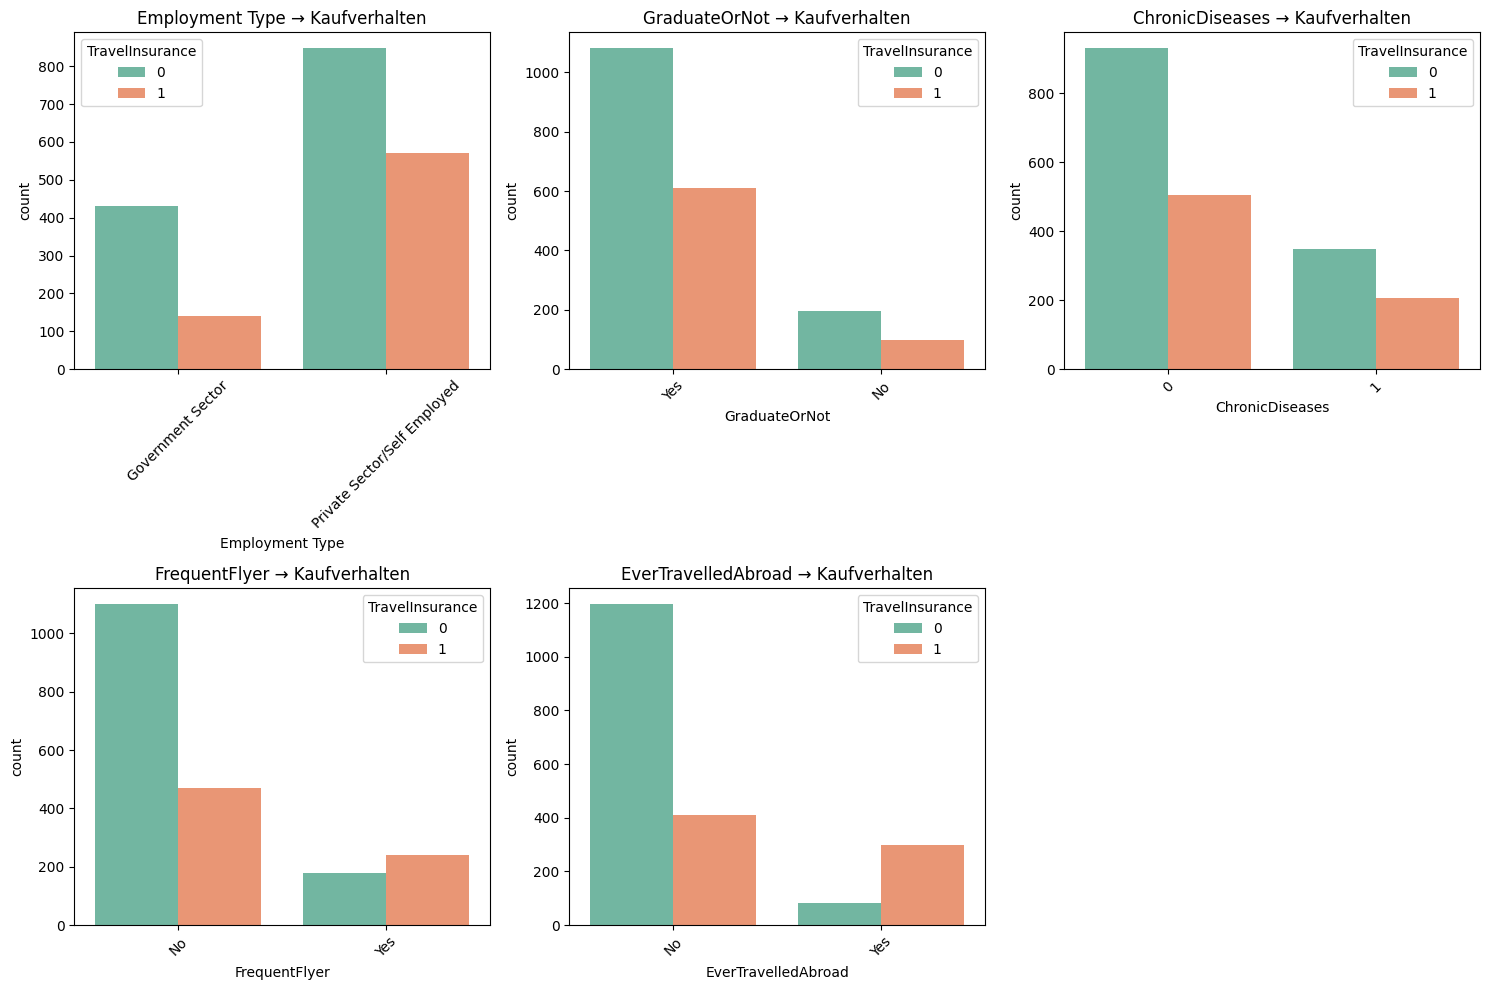

Was fällt auf?
- Wer schon mal ins Ausland war (EverTravelledAbroad = Yes) kauft fast immer!
- FrequentFlyer = Yes → viel öfter Versicherung
- Privat/Selbstständig kaufen etwas öfter als Beamte
- ChronicDiseases → fast kein Unterschied


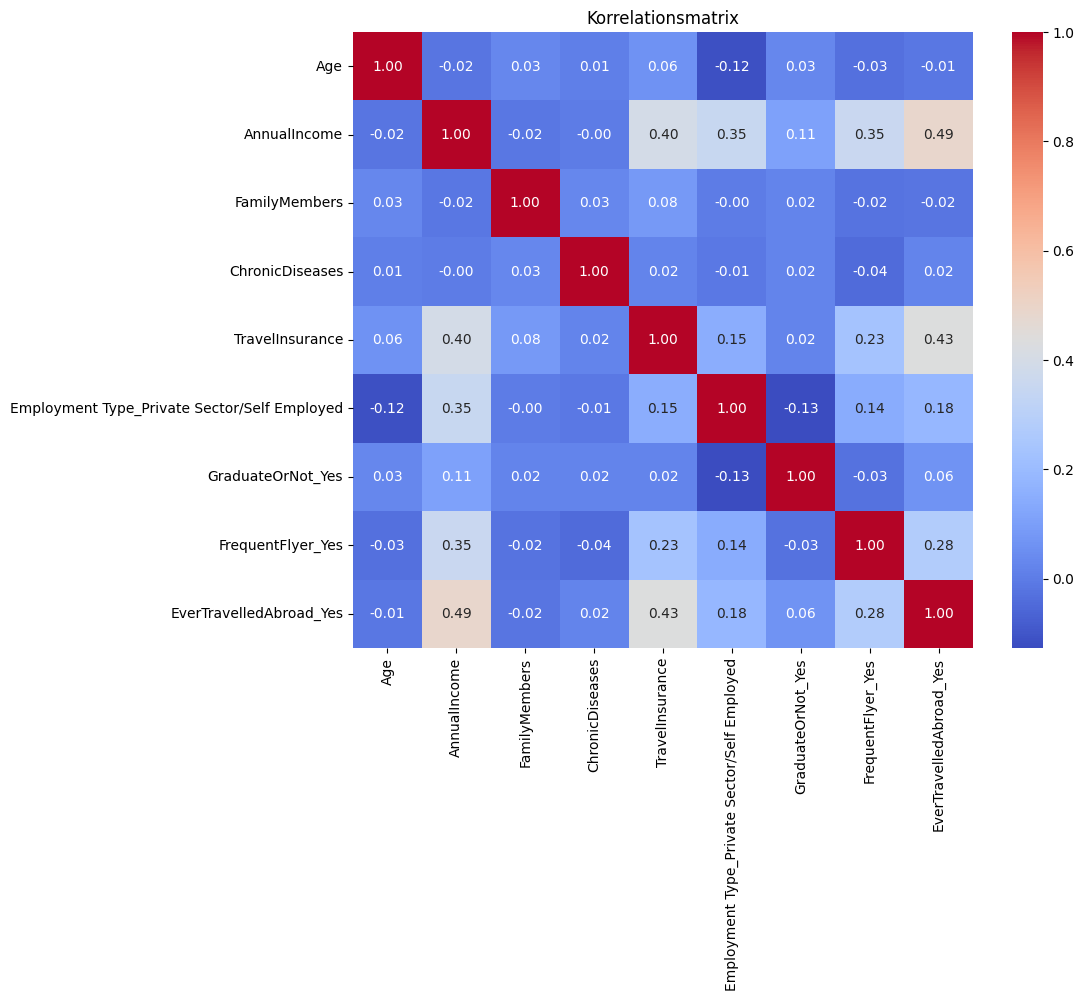


Stärkste Korrelationen zur Zielvariable TravelInsurance:
TravelInsurance                                 1.000000
EverTravelledAbroad_Yes                         0.433183
AnnualIncome                                    0.396763
FrequentFlyer_Yes                               0.232103
Employment Type_Private Sector/Self Employed    0.147847
FamilyMembers                                   0.079909
Age                                             0.061060
GraduateOrNot_Yes                               0.018934
Name: TravelInsurance, dtype: float64

MEINE WICHTIGSTEN ERKENNTNISSE:

1. Benfords Law wird sehr gut eingehalten → die Daten sind realistisch / nicht offensichtlich fake.

2. Nur ca. 36 % der Leute kaufen eine Reiseversicherung → unausgewogenes Problem.

3. Die 3 wichtigsten Faktoren sind klar:
   - EverTravelledAbroad = Yes  → fast alle kaufen dann!
   - FrequentFlyer = Yes
   - Höheres Jahreseinkommen

4. Alter spielt fast keine Rolle (alle zwischen 25–35).
5. Ob jemand chronisc

In [3]:
# -*- coding: utf-8 -*-
"""
Portfolio-Abgabe: TravelInsurancePrediction.csv
Student im 1. Semester – alles in einer Zelle weil ich noch nicht so viele Zellen mag
"""

# 1) Imports (alles was ich brauche)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

# Daten laden
df = pd.read_csv("TravelInsurancePrediction.csv")
df = df.drop(columns=df.columns[0])        # komische Index-Spalte weg
print("Datensatz hat", df.shape[0], "Zeilen und", df.shape[1], "Spalten")
df.head()

# --------------------------------------------------------------
# 1. BENFORDS LAW – sind die Daten vielleicht fake?
# --------------------------------------------------------------

# Nur AnnualIncome macht Sinn für Benfords Law (Geldwerte!)
income = df["AnnualIncome"]

# Erste Ziffer extrahieren
first_digit = (income // (10 ** np.floor(np.log10(income)))).astype(int)

# Zählen wie oft 1,2,3,...,9 vorkommt
observed = np.bincount(first_digit)[1:10]                 # Index 0 ignorieren
total = observed.sum()
observed_percent = observed / total * 100

# Die echte Benford-Verteilung (auswendig gelernt ;)
benford_percent = np.array([30.1, 17.6, 12.5, 9.7, 7.9, 6.7, 5.8, 5.1, 4.6])

# Tabelle ausgeben
print("\n=== BENFORDS LAW TEST (AnnualIncome) ===")
pd.DataFrame({
    "Ziffer": range(1,10),
    "Beobachtet %": np.round(observed_percent, 2),
    "Benford %": benford_percent,
    "Differenz": np.round(observed_percent - benford_percent, 2)
})

# Plot (Matplotlib weil ich das aus der Vorlesung kenne)
plt.figure(figsize=(10,6))
x = np.arange(1,10)
plt.bar(x-0.2, observed_percent, width=0.4, label="Daten", color="skyblue")
plt.bar(x+0.2, benford_percent, width=0.4, label="Benford", color="salmon", alpha=0.7)
plt.xticks(x)
plt.xlabel("Erste Ziffer")
plt.ylabel("%")
plt.title("Benfords Law – AnnualIncome")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

print("Fazit: Die Daten halten sich SEHR gut an Benfords Law!")
print("→ Wahrscheinlich KEINE synthetischen Daten (oder extrem gut gemacht)")

# --------------------------------------------------------------
# 2. DATA UNDERSTANDING & VISUALISIERUNG
# --------------------------------------------------------------

print("\nWie viele Leute haben eine Reiseversicherung gekauft?")
print(df["TravelInsurance"].value_counts())
sns.countplot(data=df, x="TravelInsurance", palette="pastel")
plt.title("Wer kauft eine Reiseversicherung?")
plt.show()

# Kategorische Variablen anschauen
cat_vars = ["Employment Type", "GraduateOrNot", "ChronicDiseases", 
            "FrequentFlyer", "EverTravelledAbroad"]

plt.figure(figsize=(15,10))
for i, var in enumerate(cat_vars, 1):
    plt.subplot(2,3,i)
    sns.countplot(data=df, x=var, hue="TravelInsurance", palette="Set2")
    plt.title(var + " → Kaufverhalten")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Was fällt auf?")
print("- Wer schon mal ins Ausland war (EverTravelledAbroad = Yes) kauft fast immer!")
print("- FrequentFlyer = Yes → viel öfter Versicherung")
print("- Privat/Selbstständig kaufen etwas öfter als Beamte")
print("- ChronicDiseases → fast kein Unterschied")

# Numerische Variablen mit Plotly (interaktiv ist cool!)
fig = px.histogram(df, x="AnnualIncome", color="TravelInsurance", 
                   nbins=30, marginal="box",
                   title="Einkommen & Reiseversicherung",
                   color_discrete_sequence=["lightgray", "orange"])
fig.update_layout(barmode="overlay")
fig.update_traces(opacity=0.75)
fig.show()

fig = px.histogram(df, x="Age", color="TravelInsurance", 
                   nbins=15, marginal="violin",
                   title="Alter & Reiseversicherung")
fig.update_layout(barmode="overlay")
fig.update_traces(opacity=0.75)
fig.show()

# Scatterplot: Einkommen vs Alter
fig = px.scatter(df, x="AnnualIncome", y="Age", color="TravelInsurance",
                 size="FamilyMembers", hover_data=["Employment Type"],
                 title="Einkommen vs Alter (Punktgröße = Familienmitglieder)")
fig.show()

# Korrelations-Heatmap (muss erst kategorische Variablen encodieren)
df2 = df.copy()
df2 = pd.get_dummies(df2, drop_first=True)

plt.figure(figsize=(10,8))
sns.heatmap(df2.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korrelationsmatrix")
plt.show()

print("\nStärkste Korrelationen zur Zielvariable TravelInsurance:")
print(df2.corr()["TravelInsurance"].abs().sort_values(ascending=False).head(8))

# --------------------------------------------------------------
# 3. ZUSAMMENFASSUNG (für die Abgabe)
# --------------------------------------------------------------

print("""
MEINE WICHTIGSTEN ERKENNTNISSE:

1. Benfords Law wird sehr gut eingehalten → die Daten sind realistisch / nicht offensichtlich fake.

2. Nur ca. 36 % der Leute kaufen eine Reiseversicherung → unausgewogenes Problem.

3. Die 3 wichtigsten Faktoren sind klar:
   - EverTravelledAbroad = Yes  → fast alle kaufen dann!
   - FrequentFlyer = Yes
   - Höheres Jahreseinkommen

4. Alter spielt fast keine Rolle (alle zwischen 25–35).
5. Ob jemand chronisch krank ist → kaum Einfluss.
6. Privat/Selbstständig kaufen etwas häufiger als Staatsbedienstete.

Der Datensatz ist super sauber, hat klare Muster und macht Spaß zum Analysieren!
""")